# Exemplary use of WandB logging

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np
import wandb

# Define the MLP architecture
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.layers(x)

# Generate synthetic data
def generate_data(num_samples=1000):
    X = np.random.uniform(-1.5, 1.5, size=(num_samples, 2))
    y = np.linalg.norm(X, axis=1) <= 1  # inside the unit circle
    y = y.astype(np.float32) 
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# initialize wandb
wandb.init(project='botaniqube', entity='antoni-krzysztof-czapski')

# Create model, optimizer, and loss function
model = SimpleMLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    X_train, y_train = generate_data(1000)
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    predicted = outputs.round()
    accuracy = accuracy_score(y_train.detach().numpy(), predicted.detach().numpy())
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')
    # log it to wandb so it could create line plots of loss and accuracy in different epochs
    wandb.log({'loss': loss.item(), 'accuracy': accuracy})

wandb.finish()


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: antoni-krzysztof-czapski. Use `wandb login --relogin` to force relogin


Epoch [1/100], Loss: 0.6791, Accuracy: 0.6280
Epoch [2/100], Loss: 0.6143, Accuracy: 0.6590
Epoch [3/100], Loss: 0.6039, Accuracy: 0.6400
Epoch [4/100], Loss: 0.5780, Accuracy: 0.6580
Epoch [5/100], Loss: 0.6024, Accuracy: 0.6240
Epoch [6/100], Loss: 0.5730, Accuracy: 0.6300
Epoch [7/100], Loss: 0.5353, Accuracy: 0.6420
Epoch [8/100], Loss: 0.5159, Accuracy: 0.6440
Epoch [9/100], Loss: 0.4854, Accuracy: 0.6560
Epoch [10/100], Loss: 0.4739, Accuracy: 0.7070
Epoch [11/100], Loss: 0.4542, Accuracy: 0.7470
Epoch [12/100], Loss: 0.4208, Accuracy: 0.7740
Epoch [13/100], Loss: 0.3929, Accuracy: 0.8070
Epoch [14/100], Loss: 0.3543, Accuracy: 0.8290
Epoch [15/100], Loss: 0.3372, Accuracy: 0.8390
Epoch [16/100], Loss: 0.3079, Accuracy: 0.8500
Epoch [17/100], Loss: 0.2730, Accuracy: 0.8940
Epoch [18/100], Loss: 0.2608, Accuracy: 0.9080
Epoch [19/100], Loss: 0.2353, Accuracy: 0.9480
Epoch [20/100], Loss: 0.2066, Accuracy: 0.9690
Epoch [21/100], Loss: 0.1898, Accuracy: 0.9670
Epoch [22/100], Loss: 

accuracy,▁▁▁▁▃▄▅▆▇▇██████████████████████████████
loss,█▇▇▆▆▅▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.991
loss,0.02851


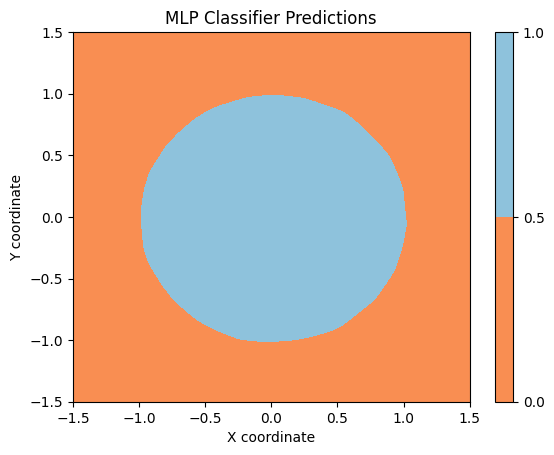

In [2]:
import matplotlib.pyplot as plt

def plot_predictions(model, num_points=100):
    # Create a mesh grid of points
    x_values = np.linspace(-1.5, 1.5, num_points)
    y_values = np.linspace(-1.5, 1.5, num_points)
    xx, yy = np.meshgrid(x_values, y_values)
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Convert to tensor
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    # Predict using the trained model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        predictions = model(grid_tensor).reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, predictions.numpy(), levels=[0, 0.5, 1], cmap='RdYlBu')
    plt.colorbar()
    plt.title('MLP Classifier Predictions')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()

# Plot the model predictions
plot_predictions(model)
